In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.plotsettings import *

In [3]:
def get_prevalence(smiles, fragment):
    return sum([fragment in x for x in smiles]) / len(smiles)

In [4]:
all_res = glob("out2/*.pkl")

In [5]:
compiled = []

for res in all_res:
    try:
        summary = load_pickle(res)
        for temp_res in summary["res_at_temp"]:
            prev = get_prevalence(temp_res["train_smiles"], summary["group"])
            compiled.append(
                {
                    "train_size": summary["train_size"],
                    "noise_level": summary["noise_level"],
                    "num_samples": summary["num_samples"],
                    "temperature": temp_res["temperature"],
                    "valid_smiles": temp_res["valid_smiles"],
                    "novel_smiles": temp_res["novel_smiles"],
                    "valid_indices": temp_res["valid_indices"],
                    "novel_indices": temp_res["novel_indices"],
                    "frac_group": temp_res["fragment_fraction"],
                    # 'constrain_satisfaction': temp_res['constrain_satisfaction'],
                    #'constrain_satisfaction_novel': temp_res['constrain_satisfaction_novel'],
                    "prevalence": prev,
                    "group": summary["group"],
                    "enrichment": temp_res["fragment_fraction"] / prev
                    if temp_res["fragment_fraction"] is not None
                    else None,
                }
            )
    except Exception:
        pass

In [6]:
all_res = pd.DataFrame(compiled)

In [7]:
all_res

,train_size,noise_level,num_samples,temperature,valid_smiles,novel_smiles,valid_indices,novel_indices,frac_group,prevalence,group,enrichment
0,500,0.1,1000,0.10,[[H]c1c([H])c([H])c(C([H])([H])N2C([H])([H])C(...,[[H]c1c([H])c([H])c(C([H])([H])N2C([H])([H])C(...,"[0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",0.000000,0.021851,C#C,0.000000
1,500,0.1,1000,0.20,[[H]c1nc(N([H])C(=O)N([H])c2c([H])c([H])c(C([H...,[[H]c1nc(N([H])C(=O)N([H])c2c([H])c([H])c(C([H...,"[0, 4, 5, 7, 8, 9, 11, 12, 15, 18, 20, 21, 22,...","[0, 4, 5, 7, 8, 9, 11, 12, 15, 18, 20, 21, 22,...",0.000000,0.021851,C#C,0.000000
2,500,0.1,1000,0.50,[[H]c1c([H])c([H])c(C([H])([H])N2C([H])([H])C(...,[[H]c1c([H])c([H])c(C([H])([H])N2C([H])([H])C(...,"[0, 1, 2, 4, 5, 7, 10, 11, 12, 13, 14, 16, 17,...","[0, 1, 2, 4, 5, 7, 10, 11, 12, 13, 14, 16, 17,...",0.000000,0.021851,C#C,0.000000
3,500,0.1,1000,0.65,[[H]c1nc([H])c(-c2nc(N3C([H])([H])C([H])([H])N...,[[H]c1nc([H])c(-c2nc(N3C([H])([H])C([H])([H])N...,"[0, 1, 3, 7, 8, 9, 11, 13, 14, 15, 16, 19, 20,...","[0, 1, 3, 7, 8, 9, 11, 13, 14, 15, 16, 19, 20,...",0.005396,0.021851,C#C,0.246929
4,500,0.1,1000,0.75,[[H]c1nc(N([H])[H])c2c([H])c(OC([H])([H])[H])c...,[[H]c1nc(N([H])[H])c2c([H])c(OC([H])([H])[H])c...,"[0, 1, 2, 3, 4, 5, 6, 8, 12, 15, 16, 17, 20, 2...","[0, 1, 2, 3, 4, 5, 6, 8, 12, 15, 16, 17, 20, 2...",0.007059,0.021851,C#C,0.323041
...,...,...,...,...,...,...,...,...,...,...,...,...
697,500,0.1,1000,0.75,[[H]c1c([H])c(Oc2c([H])c([H])c(N([H])[C@](c3c(...,[[H]c1c([H])c(Oc2c([H])c([H])c(N([H])[C@](c3c(...,"[0, 5, 7, 12, 15, 18, 21, 25, 29, 31, 35, 36, ...","[0, 5, 7, 12, 15, 18, 21, 25, 29, 31, 35, 36, ...",0.188776,0.195919,Cl,0.963540
698,500,0.1,1000,1.00,[[H]/C(=C(\C([H])([H])C([H])([H])n1c([H])c([H]...,[[H]/C(=C(\C([H])([H])C([H])([H])n1c([H])c([H]...,"[2, 8, 15, 17, 20, 22, 25, 33, 39, 40, 43, 46,...","[2, 8, 15, 17, 20, 22, 25, 33, 39, 40, 43, 46,...",0.243655,0.195919,Cl,1.243653
699,500,0.1,1000,1.25,[[H]c1nc(N(C([H])([H])C([H])([H])N([H])[H])C([...,[[H]c1nc(N(C([H])([H])C([H])([H])N([H])[H])C([...,"[33, 71, 87, 141, 152, 154, 176, 184, 228, 266...","[33, 71, 87, 141, 152, 154, 176, 184, 228, 266...",0.327586,0.195919,Cl,1.672053
700,500,0.1,1000,1.50,"[[H]c1c([H])noc1C([H])([H])[H], [H]c1c([H])c([...","[[H]c1c([H])noc1C([H])([H])[H], [H]c1c([H])c([...","[28, 38, 49, 58, 72, 114, 148, 281, 293, 337, ...","[28, 38, 49, 58, 72, 114, 148, 281, 293, 337, ...",0.000000,0.195919,Cl,0.000000


In [8]:
grouped = all_res.groupby(["group", "temperature",]).agg(
    ["mean", "std", sem]
)  #'noise_level'

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [9]:
grouped

train_size           noise_level                      \
                        mean  std  sem        mean       std       sem   
group temperature                                                        
Br    0.10             500.0  0.0  0.0    0.118182  0.025226  0.007606   
      0.20             500.0  0.0  0.0    0.118182  0.025226  0.007606   
      0.50             500.0  0.0  0.0    0.118182  0.025226  0.007606   
      0.75             500.0  0.0  0.0    0.118182  0.025226  0.007606   
      1.00             500.0  0.0  0.0    0.118182  0.025226  0.007606   
...                      ...  ...  ...         ...       ...       ...   
I     1.15             500.0  0.0  0.0    0.100000  0.000000  0.000000   
      1.25             500.0  0.0  0.0    0.112500  0.022613  0.006528   
      1.35             500.0  0.0  0.0    0.100000  0.000000  0.000000   
      1.50             500.0  0.0  0.0    0.112500  0.022613  0.006528   
      2.00             500.0  0.0  0.0    0.112500  0.022613  0.006528   

                   num_samples                        frac_group            \
                          mean         std        sem       mean       std   
group temperature                                                            
Br    0.10          363.636364  211.057941  63.636364   0.000000  0.000000   
      0.20          363.636364  211.057941  63.636364   0.000000  0.000000   
      0.50          363.636364  211.057941  63.636364   0.003593  0.003815   
      0.75          363.636364  211.057941  63.636364   0.012350  0.010911   
      1.00          363.636364  211.057941  63.636364   0.039470  0.026906   
...                        ...         ...        ...        ...       ...   
I     1.15         1000.000000    0.000000   0.000000   0.004464  0.006313   
      1.25          475.000000  316.586912  91.390769   0.011768  0.020974   
      1.35         1000.000000    0.000000   0.000000   0.000000  0.000000   
      1.50          475.000000  316.586912  91.390769   0.046107  0.059625   
      2.00          475.000000  316.586912  91.390769   0.073400  0.056244   

                            prevalence                    enrichment  \
                        sem       mean  std           sem       mean   
group temperature                                                      
Br    0.10         0.000000   0.037250  0.0  2.194271e-18   0.000000   
      0.20              NaN   0.037250  0.0  2.194271e-18   0.000000   
      0.50         0.001150   0.037250  0.0  2.194271e-18   0.096445   
      0.75         0.003290   0.037250  0.0  2.194271e-18   0.331532   
      1.00         0.008113   0.037250  0.0  2.194271e-18   1.059587   
...                     ...        ...  ...           ...        ...   
I     1.15         0.004464   0.005962  0.0  0.000000e+00   0.748804   
      1.25              NaN   0.005962  0.0  0.000000e+00   1.973806   
      1.35         0.000000   0.005962  0.0  0.000000e+00   0.000000   
      1.50         0.017212   0.005962  0.0  0.000000e+00   7.733544   
      2.00              NaN   0.005962  0.0  0.000000e+00  12.311577   

                                        
                         std       sem  
group temperature                       
Br    0.10          0.000000  0.000000  
      0.20          0.000000       NaN  
      0.50          0.102411  0.030878  
      0.75          0.292921  0.088319  
      1.00          0.722307  0.217784  
...                      ...       ...  
I     1.15          1.058969  0.748804  
      1.25          3.518021       NaN  
      1.35          0.000000  0.000000  
      1.50         10.000980  2.887034  
      2.00          9.433881       NaN  

[90 rows x 18 columns]

In [11]:
func_groups = all_res["group"].unique()

In [108]:
def plot_on_ax(ax, group, c="C0", bw=0.25, degree=2):
    lp = LocalPolynomial(bandwidth=bw, degree=degree)
    predictions_mean = lp.fit_predict(
        grouped.loc[group, :].index.values,
        grouped.loc[group, :]["enrichment"]["mean"].values,
        x_pred=grouped.loc[group, :].index.values,
    )

    predictions_up = lp.fit_predict(
        grouped.loc[group, :].index.values,
        grouped.loc[group, :]["enrichment"]["mean"].values
        + np.nan_to_num(
            grouped.loc[group, :]["enrichment"]["sem"].values,
            np.nanmean(grouped.loc[group, :]["enrichment"]["sem"].values),
        ),
        x_pred=grouped.loc[group, :].index.values,
    )

    predictions_low = lp.fit_predict(
        grouped.loc[group, :].index.values,
        grouped.loc[group, :]["enrichment"]["mean"].values
        - np.nan_to_num(
            grouped.loc[group, :]["enrichment"]["sem"].values,
            np.nanmean(grouped.loc[group, :]["enrichment"]["sem"].values),
        ),
        x_pred=grouped.loc[group, :].index.values,
    )

    ax.scatter(
        grouped.loc[group, :].index.values,
        grouped.loc[group, :]["enrichment"]["mean"].values,
        alpha=0.6,
        c=c,
        s=2,
        marker=".",
    )
    ax.plot(grouped.loc[group, :].index.values, predictions_mean, c=c, label=group)
    ax.fill_between(
        grouped.loc[group, :].index.values, predictions_low, predictions_up, alpha=0.2, color=c
    )

    return np.vstack(
        [
            predictions_mean.reshape(-1, 1),
            predictions_up.reshape(-1, 1),
            predictions_low.reshape(-1, 1),
        ]
    )

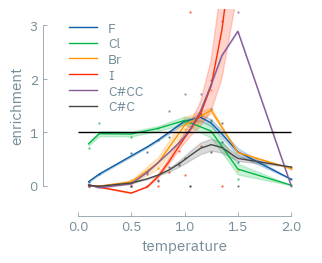

In [116]:
fig, ax = plt.subplots()
preds = []
for i, func_group in enumerate(["F", "Cl", "Br", "I", "C#CC", "C#C"]):  # func_groups:
    pred = plot_on_ax(ax, func_group, f"C{i}")
    preds.extend(list(pred))

preds = np.stack(preds)
# ax.set_yscale('symlog')
ax.legend(loc="upper left", labelspacing=0.2)
ax.hlines(1, 0, 2.0, color="k")

ax.set_ylim(0, 3)
range_frame(ax, np.array([0, 2]), np.array([0, 3]))

ax.set_xlabel("temperature")
ax.set_ylabel("enrichment")

fig.savefig("enrichment_smooth.pdf", bbox_inches="tight")

In [117]:
np.max(preds)

12.325449909168753